# Chapter 11 - Forecasting Multiple Outputs

_pg. 155-168_

## Working with Zipped Files

In [1]:
import numpy as np
import pandas as pd
import urllib
import zipfile

In [2]:
url = "http://www.economicswebinstitute.org/data/stockindexes.zip"

In [3]:
# ATTN: you need to redefine these lines according to your system
loc = "/home/dpindk/irlab/big-data-summer-school-2017/stockindexes.zip"
dest_location = "/home/dpindk/irlab/big-data-summer-school-2017/"

# ATTN: this line is missing in the book!!!
urllib.urlretrieve(url, loc)

('/home/dpindk/irlab/big-data-summer-school-2017/stockindexes.zip',
 <httplib.HTTPMessage instance at 0x7f79dd800e60>)

This is where the magic happens

In [4]:
unzip = zipfile.ZipFile(loc, 'r')  # read flag
unzip.extractall(dest_location)
unzip.close()

## Extraction of Spreadsheet Data
We have seen this code before, but now we have quite a few sheets in the Excel file.

In [5]:
loc = "/home/dpindk/irlab/big-data-summer-school-2017/stockindexes.xls"
Excel_file = pd.ExcelFile(loc)

# print Excel_file.sheet_names
for name in Excel_file.sheet_names:
    print name

Description
Dow Jones Industrial
S&P500
NIKKEI 300
Dax30
CAC40
Swiss Market-Price Index
Mib30
IBEX 35I
Bel20
FTSE100


We only want to work with the data for the FTSE 100 and Dow Jones indexes.

In [6]:
ftse_data = Excel_file.parse("FTSE100")
dj_data = Excel_file.parse("Dow Jones Industrial")
# dax_data = Excel_file.parse("Dax30")

In [7]:
ftse_data.head(10)

,Start,1995-11-30 00:00:00
0,End,2000-02-18 00:00:00
1,Frequency,D
2,Name,FTSE 100 - PRICE INDEX
3,Code,FTSE100
4,1995-11-30 00:00:00,3664.3
5,1995-12-01 00:00:00,3680.4
6,1995-12-04 00:00:00,3669.7
7,1995-12-05 00:00:00,3664.2
8,1995-12-06 00:00:00,3662.8
9,1995-12-07 00:00:00,3639.5


In [8]:
dj_data.head(10)

,Start,1995-11-30 00:00:00
0,End,2000-02-18 00:00:00
1,Frequency,D
2,Name,DOW JONES INDUSTRIALS - PRICE INDEX
3,Code,DJINDUS
4,1995-11-30 00:00:00,5074.49
5,1995-12-01 00:00:00,5087.13
6,1995-12-04 00:00:00,5139.52
7,1995-12-05 00:00:00,5177.45
8,1995-12-06 00:00:00,5199.13
9,1995-12-07 00:00:00,5159.39


In [9]:
ftse100 = ftse_data.iloc[4:1357, 1]
dj = dj_data.iloc[4:1357, 1]

Let's see what this looks like...

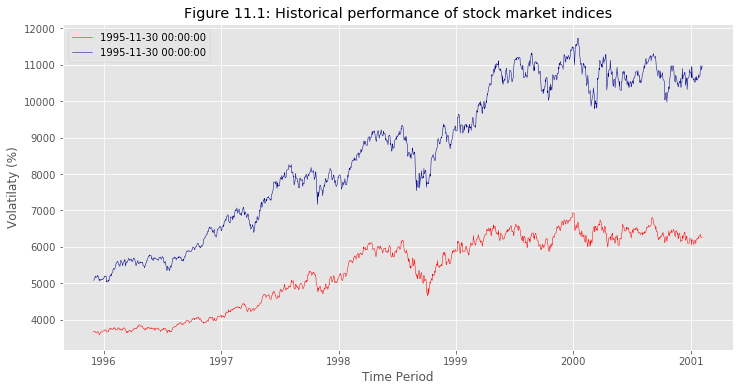

In [10]:
# FIGURE 11.1 (p.156)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

# FTSE 100 Data
xs = ftse_data.iloc[4:1375, 0]
ys = ftse_data.iloc[4:1375, 1]
plt.plot(xs, ys, '-', color="red", linewidth='0.5')

# Dow Jones Data
xs = dj_data.iloc[4:1375, 0]
ys = dj_data.iloc[4:1375, 1]
plt.plot(xs, ys, '-', color="darkblue", linewidth='0.5')

# Dax 30
# xs = dax_data.iloc[4:1375, 0]
# ys = dax_data.iloc[4:1375, 1]
# plt.plot(xs, ys, '-', color="darkgreen", linewidth='0.5')

plt.title("Figure 11.1: Historical performance of stock market indices")
plt.ylabel("Volatilaty (%)")
plt.xlabel("Time Period")
plt.legend()
plt.show()

### QUESTIONS
Are there any trends in the time series data for these indicies?

## Check Data Values

In [11]:
print ftse100.head()

4    3664.3
5    3680.4
6    3669.7
7    3664.2
8    3662.8
Name: 1995-11-30 00:00:00, dtype: object


In [12]:
print ftse100.tail()

1352    6334.53
1353    6297.53
1354    6251.83
1355    6256.43
1356    6269.21
Name: 1995-11-30 00:00:00, dtype: object


In [13]:
print dj.head()

4    5074.49
5    5087.13
6    5139.52
7    5177.45
8    5199.13
Name: 1995-11-30 00:00:00, dtype: object


In [14]:
print dj.tail()

1352    10881.2
1353    10887.4
1354    10983.6
1355    10864.1
1356    10965.9
Name: 1995-11-30 00:00:00, dtype: object


## How to Work with Multiple Targets

In [15]:
yt = pd.concat([ftse100, dj], axis=1)
print yt.head()

  1995-11-30 1995-11-30
4     3664.3    5074.49
5     3680.4    5087.13
6     3669.7    5139.52
7     3664.2    5177.45
8     3662.8    5199.13


In [16]:
yt = yt.reset_index(drop=True)
yt.columns = ['ftse100', 'dj']
print yt.head()

  ftse100       dj
0  3664.3  5074.49
1  3680.4  5087.13
2  3669.7  5139.52
3  3664.2  5177.45
4  3662.8  5199.13


Now we find the volatility across the series

In [17]:
yt = yt.pct_change()
print yt.head()
win = 30  # Remember this choice!
vol_t = yt.rolling(window=win, center=True).std()
print vol_t.head(20)

    ftse100        dj
0       NaN       NaN
1  0.004394  0.002491
2 -0.002907  0.010299
3 -0.001499  0.007380
4 -0.000382  0.004187
     ftse100        dj
0        NaN       NaN
1        NaN       NaN
2        NaN       NaN
3        NaN       NaN
4        NaN       NaN
5        NaN       NaN
6        NaN       NaN
7        NaN       NaN
8        NaN       NaN
9        NaN       NaN
10       NaN       NaN
11       NaN       NaN
12       NaN       NaN
13       NaN       NaN
14       NaN       NaN
15       NaN       NaN
16  0.005223  0.007746
17  0.005157  0.007732
18  0.005140  0.007495
19  0.005661  0.007552


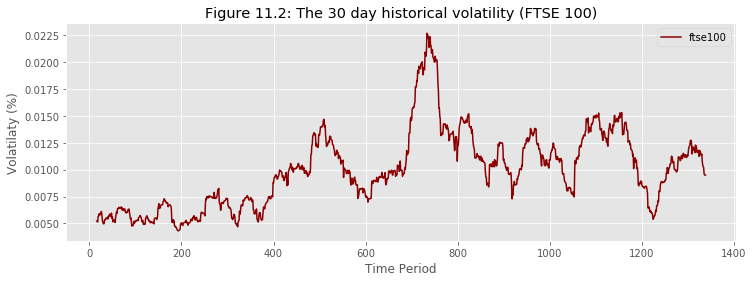

In [18]:
# FIGURE 11.2 (p.160)
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,4)

# FTSE 100 Data
ftse_xs = range(len(vol_t["ftse100"].get_values()))
ftse_ys = vol_t["ftse100"].get_values()
plt.plot(ftse_xs, ftse_ys, '-', label="ftse100", color="darkred")

plt.title("Figure 11.2: The 30 day historical volatility (FTSE 100)")
plt.ylabel("Volatilaty (%)")
plt.xlabel("Time Period")
plt.legend()
plt.show()

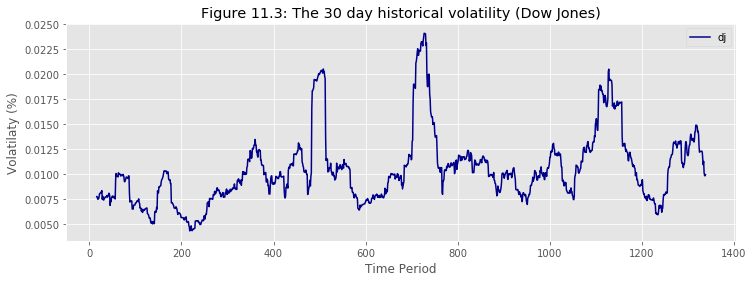

In [19]:
# FIGURE 11.2 (p.160)

# Dow Jones Data
dj_xs = range(len(vol_t["dj"].get_values()))
dj_ys = vol_t["dj"].get_values()
plt.plot(dj_xs, dj_ys, '-', label="dj", color="darkblue")

plt.title("Figure 11.3: The 30 day historical volatility (Dow Jones)")
plt.ylabel("Volatilaty (%)")
plt.xlabel("Time Period")
plt.legend()
plt.show()

## Creation of Hand Crafted Features

In [20]:
x1 = np.log((vol_t.shift(1) / vol_t.shift(2)) * vol_t.shift(1))
x2 = np.log((vol_t.shift(1) / vol_t.shift(3)) * vol_t.shift(1))
x3 = np.log((vol_t.shift(1) / vol_t.shift(4)) * vol_t.shift(1))
x4 = np.log((vol_t.shift(1) / vol_t.shift(5)) * vol_t.shift(1))
x5 = np.log((vol_t.shift(1) / vol_t.shift(6)) * vol_t.shift(1))

In [21]:
data = pd.concat([vol_t, x1, x2, x3, x4, x5], axis=1)
data.columns = ['ftse_t', 'dj_t',
                'ftse_t-1', 'dj_t-1',
                'ftse_t-2', 'dj_t-2',
                'ftse_t-3', 'dj_t-3',
                'ftse_t-4', 'dj_t-4',
                'ftse_t-5', 'dj_t-5',]
data = data.dropna()

## Target and Features in One Place

In [22]:
cols_y = ['ftse_t', 'dj_t']
y = data[cols_y]
cols = ['ftse_t-1', 'dj_t-1',
        'ftse_t-2', 'dj_t-2',
        'ftse_t-3', 'dj_t-3',
        'ftse_t-4', 'dj_t-4',
        'ftse_t-5', 'dj_t-5',]
x = data[cols]

## Scaling Data

In [23]:
from sklearn import preprocessing
num_attrib = 10
scaler_x = preprocessing.MinMaxScaler(feature_range=(-1,1))
x = np.array(x).reshape((len(x), num_attrib))
x = scaler_x.fit_transform(x)

num_response = 2

scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y), num_response))
y = scaler_y.fit_transform(y)

## Train and Test Sets

In [24]:
train_end = 1131
data_end = len(y)
x_train = x[0:train_end, ]
x_test = x[train_end + 1:data_end, ]
y_train = y[0:train_end]
y_test = y[train_end + 1:data_end]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [25]:
print "Shape of x_train is ", x_train.shape

Shape of x_train is  (1131, 1, 10)


In [26]:
print "Shape of x_test is ", x_test.shape

Shape of x_test is  (185, 1, 10)


## Model Specification and Fit

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import SGD

Using Theano backend.


In [28]:
seed = 2016
num_epochs=20
np.random.seed(seed)
fit1 = Sequential()
# UPDATED
# fit1.add(SimpleRNN(output_dim=10, activation='sigmoid', input_shape=(1, num_attrib)))
fit1.add(SimpleRNN(units=10, activation='sigmoid', input_shape=(1, num_attrib)))
# UPDATED
# fit1.add(Dense(output_dim=num_response, activation='linear'))
fit1.add(Dense(units=num_response, activation='linear'))
sgd = SGD(lr=0.01, momentum=0.90, nesterov=True)
fit1.compile(loss='mean_squared_error', optimizer=sgd)
fit1.fit(x_train, y_train, batch_size=1, epochs=num_epochs)

Epoch 1/20
1131/1131 [==============================] - 0s - loss: 0.0070     
Epoch 2/20
1131/1131 [==============================] - 0s - loss: 0.0034     
Epoch 3/20
1131/1131 [==============================] - 0s - loss: 0.0032     
Epoch 4/20
1131/1131 [==============================] - 0s - loss: 0.0029     
Epoch 5/20
1131/1131 [==============================] - 0s - loss: 0.0028     
Epoch 6/20
1131/1131 [==============================] - 0s - loss: 0.0025     
Epoch 7/20
1131/1131 [==============================] - 0s - loss: 0.0023     
Epoch 8/20
1131/1131 [==============================] - 0s - loss: 0.0022     
Epoch 9/20
1131/1131 [==============================] - 0s - loss: 0.0020     
Epoch 10/20
1131/1131 [==============================] - 0s - loss: 0.0019     
Epoch 11/20
1131/1131 [==============================] - 0s - loss: 0.0018     
Epoch 12/20
1131/1131 [==============================] - 0s - loss: 0.0018     
Epoch 13/20
1131/1131 [==========================

In [29]:
score_train = fit1.evaluate(x_train, y_train, batch_size=1)
score_test = fit1.evaluate(x_test, y_test, batch_size=1)
print 
print "in train  MSE = ", round(score_train, 5)
print "in test   MSE = ", round(score_test, 5)

  1/185 [..............................] - ETA: 0s
in train  MSE =  0.00132
in test   MSE =  0.00105


In [30]:
pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 2)))

## Visualizing the Results

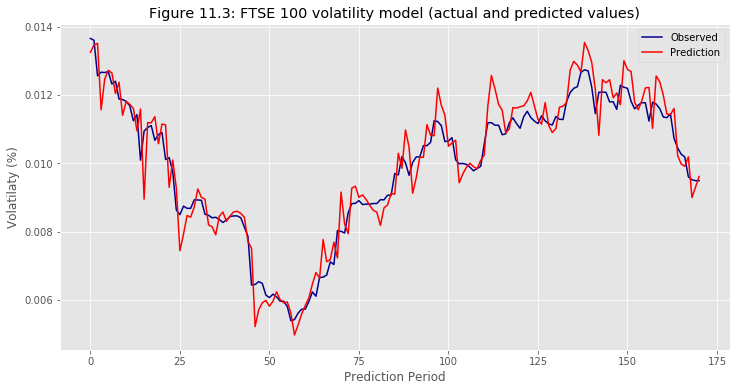

In [31]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

# FIGURE 11.3 (p. 165)
# FTSE 100 Data
ftse_pred = pred1[:, 0]

plt.plot(range(185), ftse_ys[-(185):], '-', label="Observed", color="darkblue")
plt.plot(range(185-14), ftse_pred.tolist()[-(185-14):], "-", label="Prediction", color="red")

plt.title("Figure 11.3: FTSE 100 volatility model (actual and predicted values)")
plt.ylabel("Volatilaty (%)")
plt.xlabel("Prediction Period")
plt.legend()
plt.show()

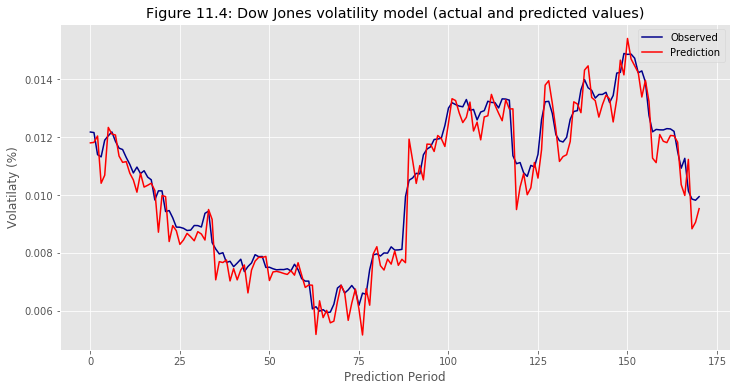

In [32]:
# FIGURE 11.4 (p. 166)
# Dow Jones Data
dj_pred = pred1[:, 1]

plt.plot(range(185), dj_ys[-(185):], '-', label="Observed", color="darkblue")
plt.plot(range(185-14), dj_pred.tolist()[-(185-14):], "-", label="Prediction", color="red")

plt.title("Figure 11.4: Dow Jones volatility model (actual and predicted values)")
plt.ylabel("Volatilaty (%)")
plt.xlabel("Prediction Period")
plt.legend()
plt.show()